In [1]:
from ultralytics import YOLO


In [2]:
# Export the model
yolo_model = YOLO( 'best.pt' ) 


image 1/1 C:\Users\debora.assis\Documents\0_Glaucoma\Dataset\REFUGE\test\images\T0001.jpg: 640x640 1 disc, 1 cup, 337.0ms
Speed: 11.1ms preprocess, 337.0ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)


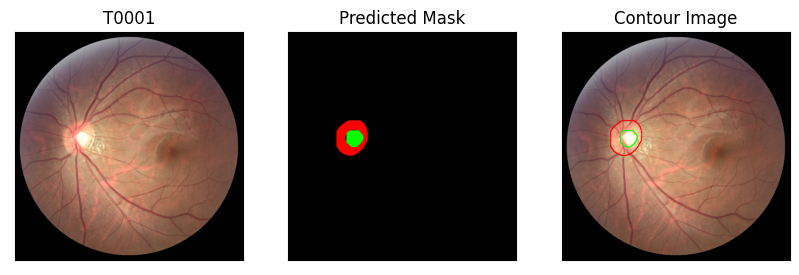


image 1/1 C:\Users\debora.assis\Documents\0_Glaucoma\Dataset\REFUGE\test\images\T0002.jpg: 640x640 1 disc, 1 cup, 321.6ms
Speed: 7.4ms preprocess, 321.6ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)


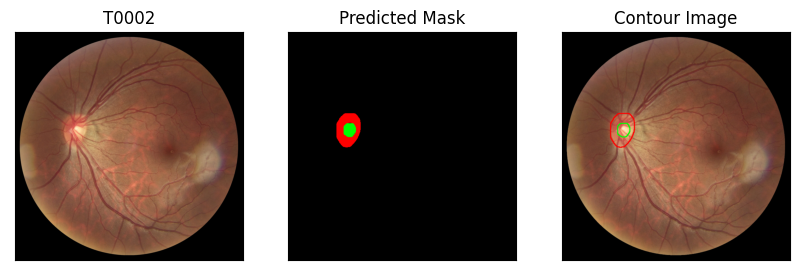


image 1/1 C:\Users\debora.assis\Documents\0_Glaucoma\Dataset\REFUGE\test\images\T0003.jpg: 640x640 1 disc, 1 cup, 352.8ms
Speed: 8.2ms preprocess, 352.8ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 640)


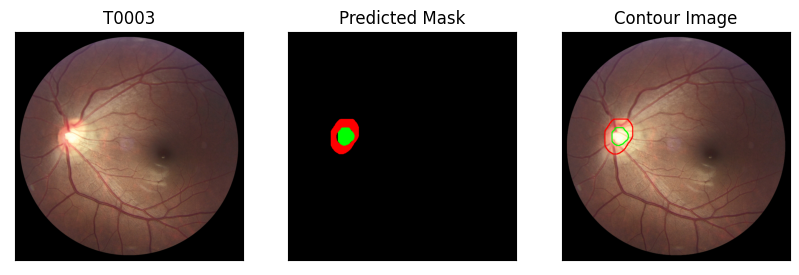


image 1/1 C:\Users\debora.assis\Documents\0_Glaucoma\Dataset\REFUGE\test\images\T0004.jpg: 640x640 1 disc, 1 cup, 343.8ms
Speed: 10.9ms preprocess, 343.8ms inference, 10.5ms postprocess per image at shape (1, 3, 640, 640)


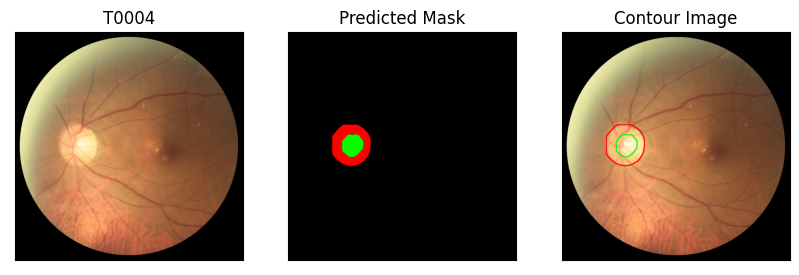


image 1/1 C:\Users\debora.assis\Documents\0_Glaucoma\Dataset\REFUGE\test\images\T0005.jpg: 640x640 1 disc, 1 cup, 356.2ms
Speed: 16.1ms preprocess, 356.2ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)

KeyboardInterrupt



In [18]:
import glob
import cv2
import numpy as np
import imutils
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

path = 'C:/Users/debora.assis/Documents/0_Glaucoma/Dataset/REFUGE/test/images'

# Mapeamento de cores para cada classe
class_colors = [(255, 0, 0), (0, 255, 0)]  # Exemplo: vermelho para classe 0, verde para classe 1

for image_path in glob.glob(path + "/*"):
    results = list(yolo_model(image_path, conf=0.1))
    result = results[0]

    if len(result) > 0:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_name = image_path.split('\\')[1][:-4]

        img2 = cv2.resize(img, (640, 640))

        to_pil = T.ToPILImage()
        mask_result = [to_pil(mask) for mask in result.masks.data]

        img_mask = np.zeros_like(img2)  # Imagem para desenhar as máscaras

        for i, mask in enumerate(mask_result):
            
            mask_array = np.array(mask)
            
            color = class_colors[i]  # Cor correspondente à classe atual
            img_mask[mask_array.astype(bool)] = color
            color = class_colors[i]  # Cor correspondente à classe atual
            contours = cv2.findContours(mask_array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            contours = imutils.grab_contours(contours)
            contours = max(contours, key=cv2.contourArea)
            cv2.drawContours(img2, [contours], -1, color, thickness=2)

        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))

        ax = ax.flatten()
        for a in ax:
            ax[0].imshow(img)
            ax[0].set_title(str(img_name), fontsize=12)
            ax[0].set_xticks([])
            ax[0].set_yticks([])

            ax[1].imshow(np.array(img_mask))
            ax[1].set_title('Predicted Mask', fontsize=12)
            ax[1].set_xticks([])
            ax[1].set_yticks([])

            ax[2].imshow(img2)
            ax[2].set_title('Contour Image', fontsize=12)
            ax[2].set_xticks([])
            ax[2].set_yticks([])

            plt.show()
